## DNN(MLP) 모델을 이용한 MNIST 데이터 셋 분류

In [0]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

* Step 1-1. Inptu tensor 와 Target tensor 준비(훈련데이터)

In [0]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [0]:
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


In [0]:
train_images[0].shape

(28, 28)

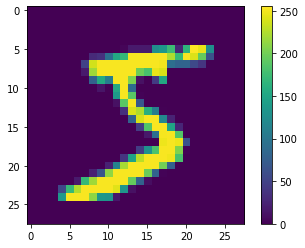

In [0]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_labels[0]

5

* Step 1-2. 입력데이터의 전처리 

In [0]:
# (60000, 28, 28) => (60000, 28*28)
train_images = train_images.reshape((60000, 28*28))

In [0]:
print(train_images.shape)

(60000, 784)


In [0]:
print(test_images.shape)

(10000, 28, 28)


In [0]:
test_images = test_images.reshape((10000, 28*28))

In [0]:
print(test_images.shape)

(10000, 784)


* Step2. DNN(MLP) 모델 디자인

In [0]:
from tensorflow.keras import models, layers

In [0]:
model = models.Sequential()
# hdden layer 256 퍼셉트론
model.add(layers.Dense(units=256, activation='relu', input_shape=(28*28,)))
model.add(layers.Dense(units=10, activation='softmax'))

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


* Step 3. 모델의 학습 정보 설정

In [0]:
# loss, optimizer, metric
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

* Step 4. 모델에 input, target 데이터 연결 후 학습

In [0]:
history = model.fit(x=train_images, y=train_labels,
                    epochs=30,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/30
375/375 [==============================] - 1s 3ms/step - loss: 5.4132 - accuracy: 0.8820 - val_loss: 1.2385 - val_accuracy: 0.9244
Epoch 2/30
375/375 [==============================] - 1s 2ms/step - loss: 0.8703 - accuracy: 0.9415 - val_loss: 0.7676 - val_accuracy: 0.9473
Epoch 3/30
375/375 [==============================] - 1s 2ms/step - loss: 0.5271 - accuracy: 0.9573 - val_loss: 0.7201 - val_accuracy: 0.9519
Epoch 4/30
375/375 [==============================] - 1s 2ms/step - loss: 0.3957 - accuracy: 0.9667 - val_loss: 0.6204 - val_accuracy: 0.9627
Epoch 5/30
375/375 [==============================] - 1s 2ms/step - loss: 0.3186 - accuracy: 0.9722 - val_loss: 0.6808 - val_accuracy: 0.9570
Epoch 6/30
375/375 [==============================] - 1s 2ms/step - loss: 0.2627 - accuracy: 0.9765 - val_loss: 0.6356 - val_accuracy: 0.9628
Epoch 7/30
375/375 [==============================] - 1s 2ms/step - loss: 0.2498 - accuracy: 0.9793 - val_loss: 0.7562 - val_accuracy: 0.9611
Epoch 

* 학습 과정 시각화 및 테스트

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [0]:
acc

[0.8820416927337646,
 0.9414791464805603,
 0.9573333263397217,
 0.9666875004768372,
 0.9721666574478149,
 0.976520836353302,
 0.9792500138282776,
 0.9814375042915344,
 0.9836666584014893,
 0.9859791398048401,
 0.9869999885559082,
 0.987500011920929,
 0.9889166951179504,
 0.9900624752044678,
 0.9903958439826965,
 0.9916874766349792,
 0.9917708039283752,
 0.9917083382606506,
 0.9931874871253967,
 0.9924166798591614,
 0.9935833215713501,
 0.9931874871253967,
 0.9931458234786987,
 0.9942916631698608,
 0.9938333630561829,
 0.9946249723434448,
 0.9944583177566528,
 0.9948333501815796,
 0.9947291612625122,
 0.9950208067893982]

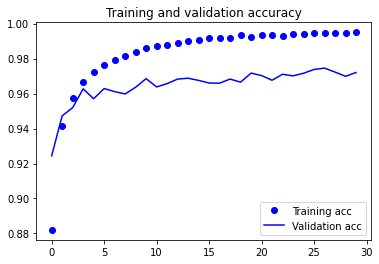

In [0]:
epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()

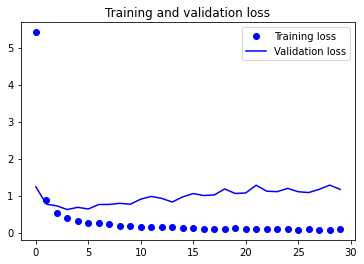

In [0]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
test_loss, test_acc = model.evaluate(x=test_images, y=test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 1.0516 - accuracy: 0.9750


In [0]:
import numpy as np

In [0]:
predict = model.predict(test_images[0].reshape((1, 28*28)))

In [0]:
predict

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [0]:
print(np.argmax(predict[0]))

7


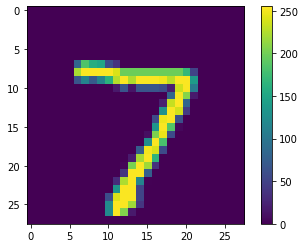

In [0]:
plt.figure()
plt.imshow(test_images[0].reshape(28, 28))
plt.colorbar()
plt.grid(False)
plt.show()